<a href="https://colab.research.google.com/github/pratheeshsailor/OLA---Ensemble-Learning/blob/main/OLA_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                    Business Case: OLA - Ensemble Learning

# Column Profiling:
MMMM-YY : Reporting Date (Monthly)

Driver_ID : Unique id for drivers

Age : Age of the driver

Gender : Gender of the driver – Male : 0, Female: 1

City : City Code of the driver

Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate

Income : Monthly average Income of the driver

Date Of Joining : Joining date for the driver

LastWorkingDate : Last date of working for the driver

Joining Designation : Designation of the driver at the time of joining

Grade : Grade of the driver at the time of reporting

Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)

Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("ola_driver_scaler.csv")

In [3]:
df.head(3)

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2


In [ ]:
# Shape of the dataset
print("No. of rows : ",df.shape[0])
print("No. of columns : ",df.shape[1])

No. of rows :  19104
No. of columns :  14


In [ ]:
df.drop(columns='Unnamed: 0',axis=1,inplace=True)

In [ ]:
df["Gender"].replace({0.0:"Male",1.0:"Female"},inplace=True)

In [ ]:
(df.isna().sum() / df.shape[0] )*100

MMM-YY                   0.000000
Driver_ID                0.000000
Age                      0.319305
Gender                   0.272194
City                     0.000000
Education_Level          0.000000
Income                   0.000000
Dateofjoining            0.000000
LastWorkingDate         91.541039
Joining Designation      0.000000
Grade                    0.000000
Total Business Value     0.000000
Quarterly Rating         0.000000
dtype: float64

In [ ]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [ ]:
# unique values in the dataset
for col in df:
    print(f'Number of unique values in the {col} column:',df[col].nunique())

Number of unique values in the MMM-YY column: 24
Number of unique values in the Driver_ID column: 2381
Number of unique values in the Age column: 36
Number of unique values in the Gender column: 2
Number of unique values in the City column: 29
Number of unique values in the Education_Level column: 3
Number of unique values in the Income column: 2383
Number of unique values in the Dateofjoining column: 869
Number of unique values in the LastWorkingDate column: 493
Number of unique values in the Joining Designation column: 5
Number of unique values in the Grade column: 5
Number of unique values in the Total Business Value column: 10181
Number of unique values in the Quarterly Rating column: 4


In [ ]:
columns = df.columns
columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  object 
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.9+ MB


In [ ]:
# Converting date columns into Datatime format :
df['MMM-YY']=pd.to_datetime(df['MMM-YY'])
df["Dateofjoining"] = pd.to_datetime(df["Dateofjoining"])
df["LastWorkingDate"] = pd.to_datetime(df["LastWorkingDate"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  object        
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
dtypes: datetime64[ns

In [ ]:
df.describe()

,Driver_ID,Age,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


* 19104 drivers are available
* average income of driver is RS.65652
* Maximum income is 188418 and minimum income is 10747


In [ ]:

for column in columns:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print('----------------------------------')

Column: MMM-YY
2019-01-01    1022
2019-02-01     944
2019-03-01     870
2020-12-01     819
2020-10-01     818
2020-08-01     812
2020-09-01     809
2020-07-01     806
2020-11-01     805
2019-12-01     795
2019-04-01     794
2020-01-01     782
2019-11-01     781
2020-06-01     770
2020-05-01     766
2019-05-01     764
2019-09-01     762
2020-02-01     761
2019-07-01     757
2019-08-01     754
2019-10-01     739
2020-04-01     729
2019-06-01     726
2020-03-01     719
Name: MMM-YY, dtype: int64
----------------------------------
Column: Driver_ID
2110    24
2617    24
1623    24
1642    24
1644    24
        ..
1614     1
445      1
2397     1
1619     1
469      1
Name: Driver_ID, Length: 2381, dtype: int64
----------------------------------
Column: Age
36.0    1283
33.0    1250
34.0    1234
30.0    1146
32.0    1143
35.0    1138
31.0    1076
29.0    1013
37.0     862
38.0     854
39.0     788
28.0     772
27.0     744
40.0     701
41.0     661
26.0     566
42.0     478
25.0     449
44.

In [ ]:
df.Income.min(),df.Income.max()

(10747, 188418)

In [ ]:
df.Age.value_counts

<bound method IndexOpsMixin.value_counts of 0        28.0
1        28.0
2        28.0
3        31.0
4        31.0
         ... 
19099    30.0
19100    30.0
19101    30.0
19102    30.0
19103    30.0
Name: Age, Length: 19104, dtype: float64>

<Axes: xlabel='Age'>

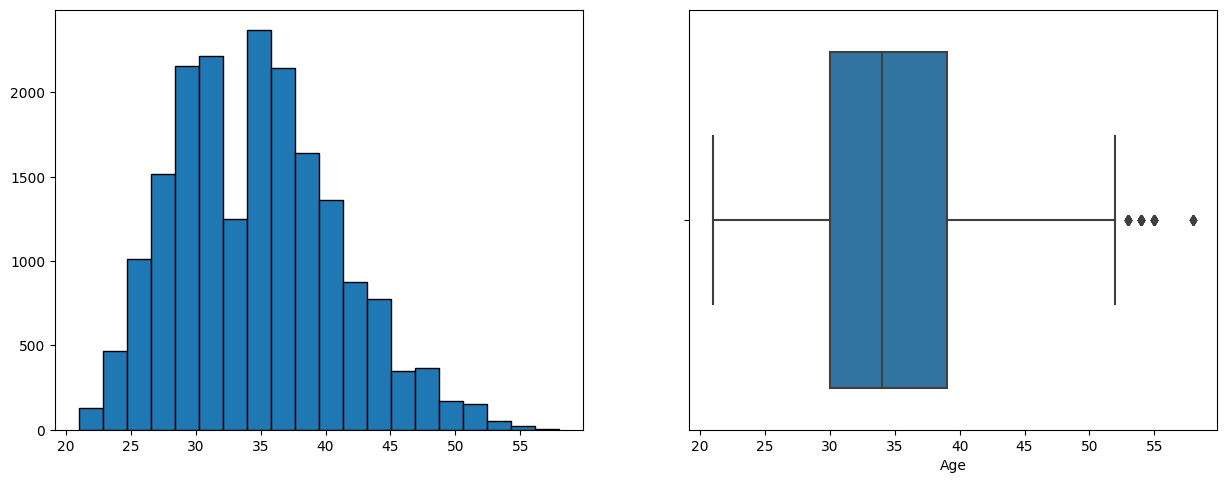

In [ ]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
df['Age'].hist(bins=20, edgecolor='black', grid=False)

plt.subplot(2,2,2)
sns.boxplot( data=df ,x='Age')


* Max age the drivers work between 30 to 40

<Axes: xlabel='Gender', ylabel='count'>

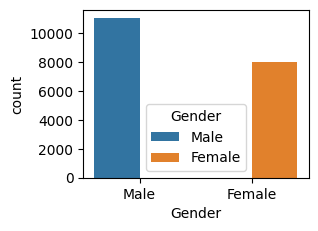

In [ ]:
plt.subplot(2,2,1)
sns.countplot( data=df ,x='Gender',hue='Gender')

<Axes: title={'center': 'Monthly Reporting Date Distribution'}>

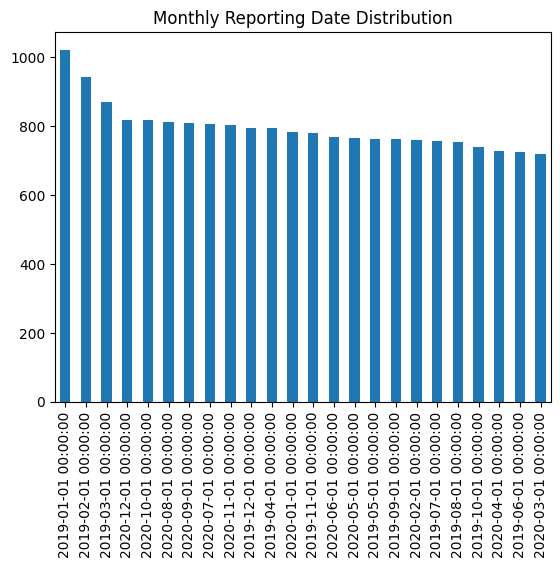

In [ ]:
df['MMM-YY'].value_counts().plot(kind='bar', title='Monthly Reporting Date Distribution')


<Axes: title={'center': 'Gender Distribution (0: Male, 1: Female)'}>

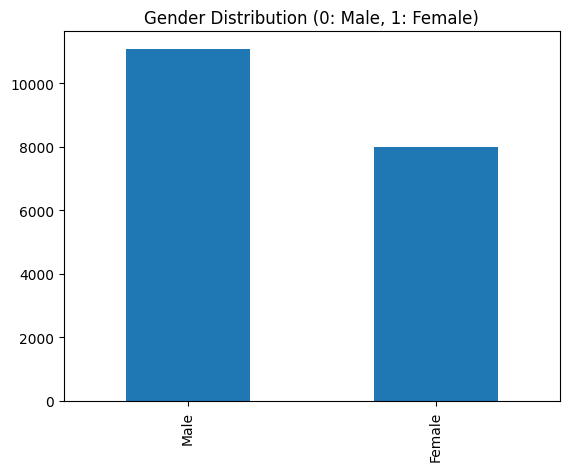

In [ ]:
df['Gender'].value_counts().plot(kind='bar', title='Gender Distribution (0: Male, 1: Female)')


<Axes: title={'center': 'Education Level Distribution'}>

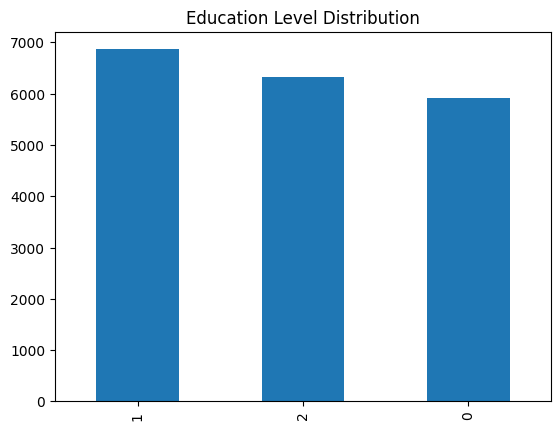

In [ ]:
df['Education_Level'].value_counts().plot(kind='bar', title='Education Level Distribution')


<Axes: >

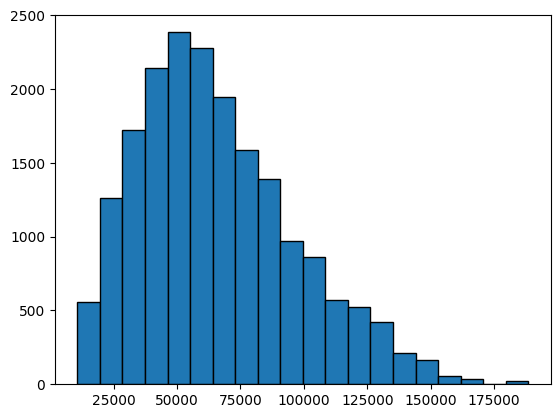

In [ ]:
df['Income'].hist(bins=20, edgecolor='black', grid=False)


<Axes: title={'center': 'Joining Designation Distribution'}>

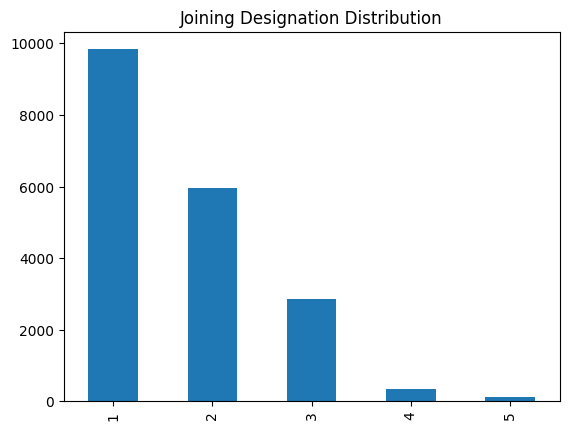

In [ ]:
df['Joining Designation'].value_counts().plot(kind='bar', title='Joining Designation Distribution')


<Axes: title={'center': 'Grade Distribution'}>

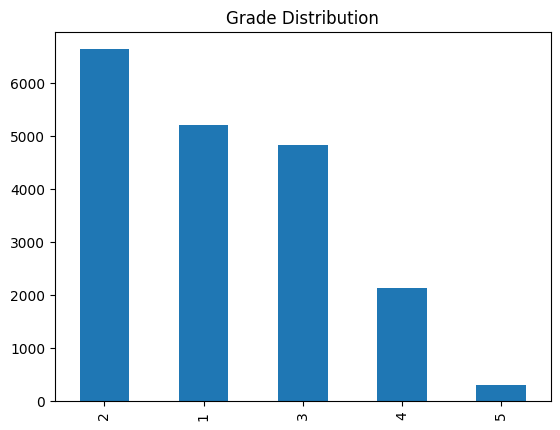

In [ ]:
df['Grade'].value_counts().plot(kind='bar', title='Grade Distribution')


<Axes: >

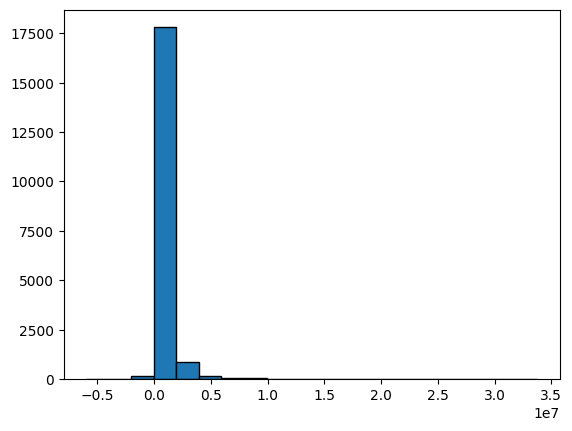

In [ ]:
df['Total Business Value'].hist(bins=20, edgecolor='black', grid=False)


<Axes: title={'center': 'Quarterly Rating Distribution'}>

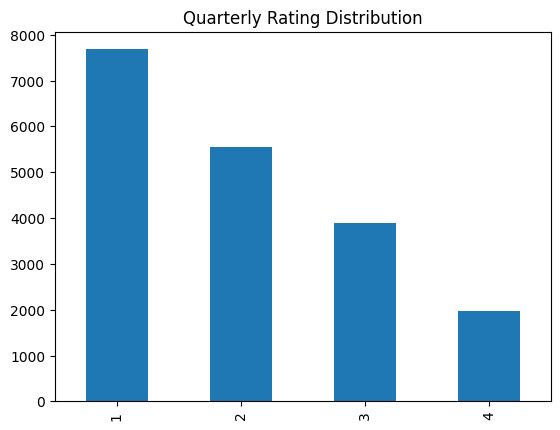

In [ ]:
df['Quarterly Rating'].value_counts().plot(kind='bar', title='Quarterly Rating Distribution')


In [ ]:
# between 'gender' and 'Education_Level'
gender_education_crosstab = pd.crosstab(df['Gender'], df['Education_Level'], margins=True, margins_name='Total')
gender_education_crosstab

Education_Level,0,1,2,Total
Gender,,,,
Female,2453,2971,2554,7978
Male,3439,3874,3761,11074
Total,5892,6845,6315,19052


* most of the drivers education level  lie in 1

In [ ]:
# between 'Gender' and 'City':
gender_city_crosstab = pd.crosstab(df['Gender'], df['City'], margins=True, margins_name='Total')
gender_city_crosstab.T


Gender,Female,Male,Total
City,,,
C1,294,381,675
C10,281,462,743
C11,247,219,466
C12,254,471,725
C13,191,375,566
C14,217,428,645
C15,256,501,757
C16,275,434,709
C17,190,248,438


* MAX female drivers work in city C20
* MAX male drivers work in city C26

In [ ]:
# between 'Education_Level' and 'Income':
education_income_crosstab = pd.crosstab(df['Education_Level'], df['Income'], margins=True, margins_name='Total')
education_income_crosstab


Income,10747,10883,11068,11236,11706,11889,11943,12064,12105,12456,...,149403,149637,152234,153109,153766,157124,167758,169549,188418,Total
Education_Level,,,,,,,,,,,,,,,,,,,,,
0,3,1,16,3,5,5,3,4,3,4,...,0,0,0,0,0,0,0,0,0,5913
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6864
2,0,0,0,0,0,0,0,0,0,0,...,3,24,24,24,10,24,10,24,24,6327
Total,3,1,16,3,5,5,3,4,3,4,...,3,24,24,24,10,24,10,24,24,19104


* The Education_Level	1 has highest level of income
* 1>2>0

In [ ]:
# between 'Joining Designation' and 'Grade':
designation_grade_crosstab = pd.crosstab(df['Joining Designation'], df['Grade'], margins=True, margins_name='Total')
designation_grade_crosstab

Grade,1,2,3,4,5,Total
Joining Designation,,,,,,
1,5202,2441,1405,721,62,9831
2,0,4186,698,972,99,5955
3,0,0,2723,117,7,2847
4,0,0,0,334,7,341
5,0,0,0,0,130,130
Total,5202,6627,4826,2144,305,19104


* only 62 new joiners reporting at the time

In [ ]:
# Average Age by Gender:
pivot_age_gender = df.pivot_table(values='Age', index='Gender', aggfunc='mean')
pivot_age_gender


,Age
Gender,
Female,34.978627
Male,34.468334


In [ ]:
# Total Business Value by Education Level:
pivot_business_education = df.pivot_table(values='Total Business Value', index='Education_Level', aggfunc='sum')
pivot_business_education


,Total Business Value
Education_Level,
0,3343273220
1,4127239920
2,3450519140


In [ ]:
# Average Income by Joining Designation:
pivot_income_designation = df.pivot_table(values='Income', index='Joining Designation', aggfunc='mean')
pivot_income_designation


,Income
Joining Designation,
1,56694.222765
2,68904.659110
3,81805.143309
4,106439.120235
5,133331.969231


In [ ]:
# Quarterly Rating and Total Business Value:
pivot_rating_business = df.pivot_table(values='Total Business Value', index='Quarterly Rating', aggfunc='sum')
pivot_rating_business


,Total Business Value
Quarterly Rating,
1,632470780
2,2972872700
3,3645023190
4,3670665610


**Restucturing the data based on driver**

In [ ]:
ola1 = df.copy()

In [ ]:
functions = {'MMM-YY':'count',
   #          'Driver_ID':'first',
             'Age':'max',
   #          'Gender':'last',
            'City':'last',
             'Education_Level':'max',
             'Dateofjoining':'first',
#            'LastWorkingDate':'last',
             'Grade':'mean',
             'Total Business Value':'sum',
            'Income':'mean',
            'Joining Designation':'last',
             'Quarterly Rating':'mean'}

In [ ]:
agg_df = df.groupby(["Driver_ID"]).aggregate(functions).reset_index()

In [ ]:
final_data = agg_df.rename(columns={"MMM-YY":"No_of_Records",
                      "Dateofjoining":"Date_of_joining",
                      "Joining Designation":"Joining_Designation",
                      "Total Business Value" : "Total_Business_Value",
                      "Quarterly Rating":"Quarterly_Rating"})

In [ ]:
final_data

,Driver_ID,No_of_Records,Age,City,Education_Level,Date_of_joining,Grade,Total_Business_Value,Income,Joining_Designation,Quarterly_Rating
0,1,3,28.0,C23,2,2018-12-24,1.0,1715580,57387.0,1,2.000000
1,2,2,31.0,C7,2,2020-11-06,2.0,0,67016.0,2,1.000000
2,4,5,43.0,C13,2,2019-12-07,2.0,350000,65603.0,2,1.000000
3,5,3,29.0,C9,0,2019-01-09,1.0,120360,46368.0,1,1.000000
4,6,5,31.0,C11,1,2020-07-31,3.0,1265000,78728.0,3,1.600000
...,...,...,...,...,...,...,...,...,...,...,...
2376,2784,24,34.0,C24,0,2015-10-15,3.0,21748820,82815.0,2,2.625000
2377,2785,3,34.0,C9,0,2020-08-28,1.0,0,12105.0,1,1.000000
2378,2786,9,45.0,C19,0,2018-07-31,2.0,2815090,35370.0,2,1.666667
2379,2787,6,28.0,C20,2,2018-07-21,1.0,977830,69498.0,1,1.500000


In [ ]:
final_data = pd.merge(left = df.groupby(["Driver_ID"])["LastWorkingDate"].unique().apply(lambda x:x[-1]),
        right = final_data,
         on = "Driver_ID",
         how="outer"
    )

In [ ]:
final_data.head(3)

,Driver_ID,LastWorkingDate,No_of_Records,Age,City,Education_Level,Date_of_joining,Grade,Total_Business_Value,Income,Joining_Designation,Quarterly_Rating
0,1,2019-03-11,3,28.0,C23,2,2018-12-24,1.0,1715580,57387.0,1,2.0
1,2,NaT,2,31.0,C7,2,2020-11-06,2.0,0,67016.0,2,1.0
2,4,2020-04-27,5,43.0,C13,2,2019-12-07,2.0,350000,65603.0,2,1.0


In [ ]:
final_data = pd.merge(left = df.groupby(["Driver_ID"])["Gender"].unique().apply(lambda x:x[-1]),
        right = final_data,
         on = "Driver_ID",
         how="outer"
    )

In [ ]:
data = final_data.copy()

In [ ]:
data.head(4)

,Driver_ID,Gender,LastWorkingDate,No_of_Records,Age,City,Education_Level,Date_of_joining,Grade,Total_Business_Value,Income,Joining_Designation,Quarterly_Rating
0,1,Male,2019-03-11,3,28.0,C23,2,2018-12-24,1.0,1715580,57387.0,1,2.0
1,2,Male,NaT,2,31.0,C7,2,2020-11-06,2.0,0,67016.0,2,1.0
2,4,Male,2020-04-27,5,43.0,C13,2,2019-12-07,2.0,350000,65603.0,2,1.0
3,5,Male,2019-03-07,3,29.0,C9,0,2019-01-09,1.0,120360,46368.0,1,1.0


In [ ]:
data['Gender'].value_counts()

Male      1380
Female     956
Name: Gender, dtype: int64

Target variable creation:

target which tells whether the driver has left the company- driver whose last working day is present will have the value 1

In [ ]:
pd.Series(np.where(data["LastWorkingDate"].isna(),0,1)).value_counts()

1    1616
0     765
dtype: int64

In [ ]:
data["Churn"] = data["LastWorkingDate"].fillna(0)

In [ ]:
def apply_0_1(y):
    if y == 0:
        return 0
    if y != 0:
        return 1


In [ ]:
data["Churn"] = data["Churn"].apply(apply_0_1)

In [ ]:
data["Churn"].value_counts()

1    1616
0     765
Name: Churn, dtype: int64

In [ ]:
data["Churn"].value_counts(normalize=True)*100

1    67.870643
0    32.129357
Name: Churn, dtype: float64

* class 1 is the driviers who churned . 68%
* class 0 is the driviers who have not churned . 32%
* Data is imbalanced

In [ ]:
data["joining_Year"] = data["Date_of_joining"].dt.year

In [ ]:
(data.isna().sum()/len(data))*100

Driver_ID                0.000000
Gender                   1.889962
LastWorkingDate         32.129357
No_of_Records            0.000000
Age                      0.000000
City                     0.000000
Education_Level          0.000000
Date_of_joining          0.000000
Grade                    0.000000
Total_Business_Value     0.000000
Income                   0.000000
Joining_Designation      0.000000
Quarterly_Rating         0.000000
Churn                    0.000000
joining_Year             0.000000
dtype: float64

Feature Engineering :

whether the quarterly rating has increased for that driver

for those whose quarterly rating has increased we assign the value 1

In [ ]:
def app_rating_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [ ]:
Quarterly_Rating_increased = df.groupby("Driver_ID")["Quarterly Rating"].unique().apply(app_rating_inc)

In [ ]:
data = pd.merge(left = Quarterly_Rating_increased,
        right = data,
         on = "Driver_ID",
         how="outer"
    )

In [ ]:
data["Quarterly_Rating_increased"] = data["Quarterly Rating"]

In [ ]:
data.drop(["Quarterly Rating"],axis=1,inplace=True)

whether the monthly income has increased for that driver -
for those whose monthly income has increased we assign the value 1

In [ ]:
def app_income_inc(y):

    if len(y)>=2:
        for i in range(len(y)):
            if y[-1]>y[-2]:
                return 1
            else:
                return 0
    else:
        return 0

In [ ]:
data = pd.merge(left = df.groupby("Driver_ID")["Income"].unique().apply(app_income_inc).rename("Increased_Income"),
        right = data,
         on = "Driver_ID",
         how="outer"
    )

In [ ]:
Mdata = data.copy()

In [ ]:
Mdata["Gender"].replace({"Male":0,
                       "Female":1},inplace=True)

In [ ]:
Mdata.drop(['Driver_ID'],axis = 1, inplace=True)

In [ ]:
Mdata.isna().sum()

Increased_Income                0
Gender                         45
LastWorkingDate               765
No_of_Records                   0
Age                             0
City                            0
Education_Level                 0
Date_of_joining                 0
Grade                           0
Total_Business_Value            0
Income                          0
Joining_Designation             0
Quarterly_Rating                0
Churn                           0
joining_Year                    0
Quarterly_Rating_increased      0
dtype: int64

In [ ]:
Mdata

,Increased_Income,Gender,LastWorkingDate,No_of_Records,Age,City,Education_Level,Date_of_joining,Grade,Total_Business_Value,Income,Joining_Designation,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,0,0.0,2019-03-11,3,28.0,C23,2,2018-12-24,1.0,1715580,57387.0,1,2.000000,1,2018,0
1,0,0.0,NaT,2,31.0,C7,2,2020-11-06,2.0,0,67016.0,2,1.000000,0,2020,0
2,0,0.0,2020-04-27,5,43.0,C13,2,2019-12-07,2.0,350000,65603.0,2,1.000000,1,2019,0
3,0,0.0,2019-03-07,3,29.0,C9,0,2019-01-09,1.0,120360,46368.0,1,1.000000,1,2019,0
4,0,1.0,NaT,5,31.0,C11,1,2020-07-31,3.0,1265000,78728.0,3,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,NaT,24,34.0,C24,0,2015-10-15,3.0,21748820,82815.0,2,2.625000,0,2015,1
2377,0,1.0,2020-10-28,3,34.0,C9,0,2020-08-28,1.0,0,12105.0,1,1.000000,1,2020,0
2378,0,0.0,2019-09-22,9,45.0,C19,0,2018-07-31,2.0,2815090,35370.0,2,1.666667,1,2018,0
2379,0,1.0,2019-06-20,6,28.0,C20,2,2018-07-21,1.0,977830,69498.0,1,1.500000,1,2018,0


In [ ]:
pd.to_datetime("2021-06-01")

Timestamp('2021-06-01 00:00:00')

In [ ]:
Mdata["LastWorkingDate"] = Mdata["LastWorkingDate"].fillna(pd.to_datetime("2021-06-01"))

In [ ]:
(Mdata["LastWorkingDate"] - Mdata["Date_of_joining"])

0        77 days
1       207 days
2       142 days
3        57 days
4       305 days
          ...   
2376   2056 days
2377     61 days
2378    418 days
2379    334 days
2380    358 days
Length: 2381, dtype: timedelta64[ns]

In [ ]:
Mdata["Driver_tenure_days"] = (Mdata["LastWorkingDate"] - Mdata["Date_of_joining"])

In [ ]:
Mdata["Driver_tenure_days"] = Mdata["Driver_tenure_days"].dt.days

In [ ]:
Mdata.drop(["LastWorkingDate","Date_of_joining"],inplace=True,axis = 1)

In [ ]:
Mdata.drop(["Driver_tenure_days"],inplace=True,axis = 1)

In [ ]:
Mdata

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Grade,Total_Business_Value,Income,Joining_Designation,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,0,0.0,3,28.0,C23,2,1.0,1715580,57387.0,1,2.000000,1,2018,0
1,0,0.0,2,31.0,C7,2,2.0,0,67016.0,2,1.000000,0,2020,0
2,0,0.0,5,43.0,C13,2,2.0,350000,65603.0,2,1.000000,1,2019,0
3,0,0.0,3,29.0,C9,0,1.0,120360,46368.0,1,1.000000,1,2019,0
4,0,1.0,5,31.0,C11,1,3.0,1265000,78728.0,3,1.600000,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,24,34.0,C24,0,3.0,21748820,82815.0,2,2.625000,0,2015,1
2377,0,1.0,3,34.0,C9,0,1.0,0,12105.0,1,1.000000,1,2020,0
2378,0,0.0,9,45.0,C19,0,2.0,2815090,35370.0,2,1.666667,1,2018,0
2379,0,1.0,6,28.0,C20,2,1.0,977830,69498.0,1,1.500000,1,2018,0


In [ ]:
Mdata.columns

Index(['Increased_Income', 'Gender', 'No_of_Records', 'Age', 'City',
       'Education_Level', 'Grade', 'Total_Business_Value', 'Income',
       'Joining_Designation', 'Quarterly_Rating', 'Churn', 'joining_Year',
       'Quarterly_Rating_increased'],
      dtype='object')

In [ ]:
Mdata["Grade"] = np.round(Mdata["Grade"])

In [ ]:
Mdata["Quarterly_Rating"]= Mdata["Quarterly_Rating"].round()

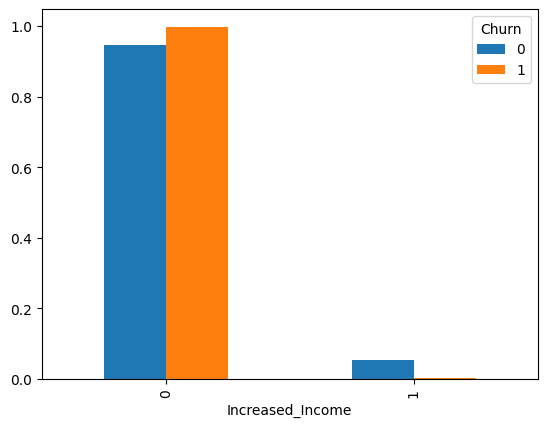

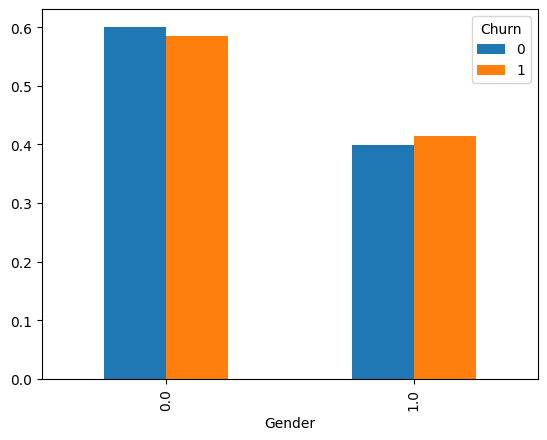

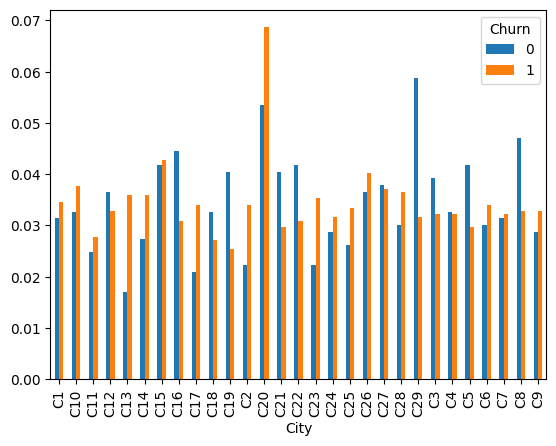

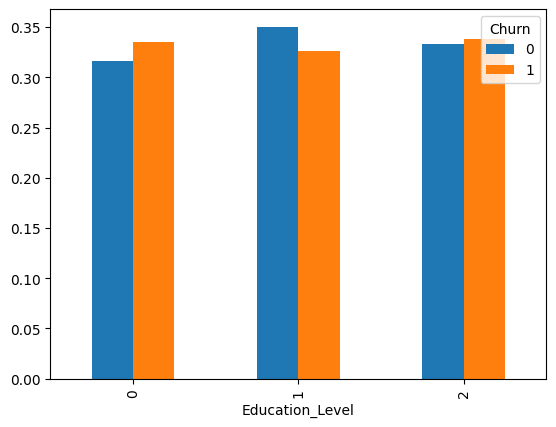

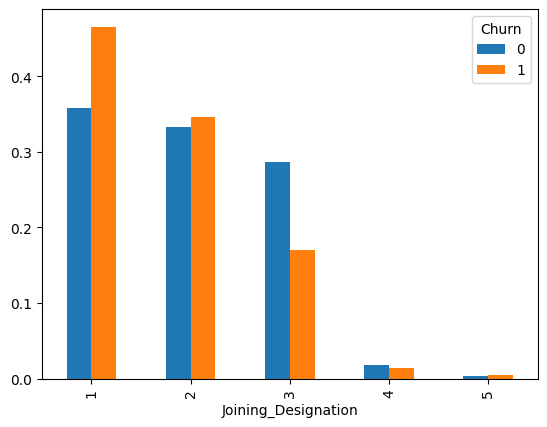

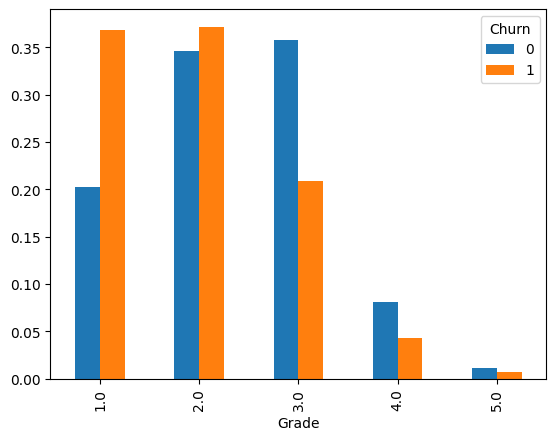

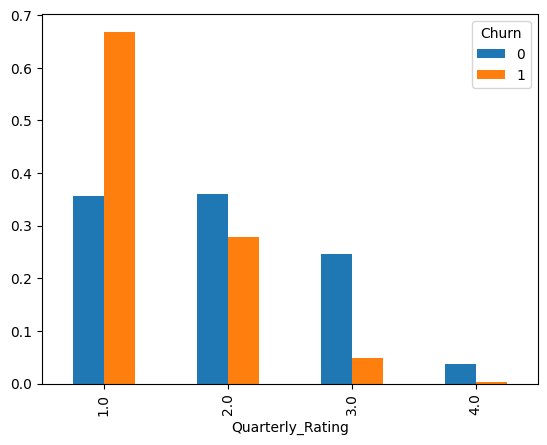

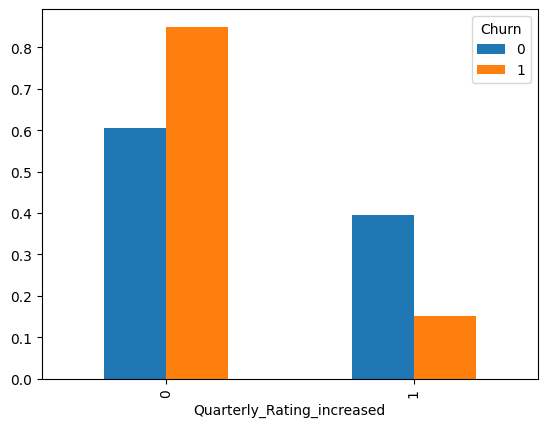

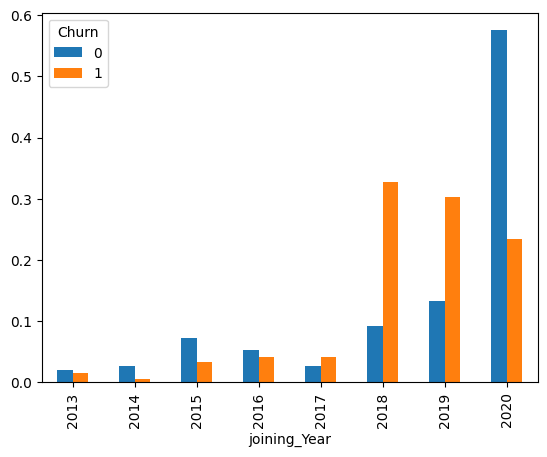

In [ ]:
categorical_features = ['Increased_Income', 'Gender','City','Education_Level',
                   'Joining_Designation','Grade','Quarterly_Rating','Quarterly_Rating_increased',"joining_Year"]

for col in categorical_features:
    pd.crosstab(index = Mdata[col],
               columns = Mdata["Churn"],
               normalize="columns").plot(kind = "bar")
    plt.show()

In [ ]:
Mdata.isna().sum()

Increased_Income               0
Gender                        45
No_of_Records                  0
Age                            0
City                           0
Education_Level                0
Grade                          0
Total_Business_Value           0
Income                         0
Joining_Designation            0
Quarterly_Rating               0
Churn                          0
joining_Year                   0
Quarterly_Rating_increased     0
dtype: int64

# SimpleImputer

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
Mdata["Gender"] = imputer.fit_transform(X=Mdata["Gender"].values.reshape(-1,1),y=Mdata["Churn"].values.reshape(-1,1))

In [ ]:
Mdata["Gender"].value_counts(dropna=False)

0.0    1425
1.0     956
Name: Gender, dtype: int64

In [ ]:
Mdata.isna().sum()

Increased_Income              0
Gender                        0
No_of_Records                 0
Age                           0
City                          0
Education_Level               0
Grade                         0
Total_Business_Value          0
Income                        0
Joining_Designation           0
Quarterly_Rating              0
Churn                         0
joining_Year                  0
Quarterly_Rating_increased    0
dtype: int64

In [ ]:
Mdata.describe()

,Increased_Income,Gender,No_of_Records,Age,Education_Level,Grade,Total_Business_Value,Income,Joining_Designation,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.00000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.018480,0.401512,8.02352,33.663167,1.00756,2.078538,4.586742e+06,59232.460484,1.820244,1.573289,0.678706,2018.536329,0.228895
std,0.134706,0.490307,6.78359,5.983375,0.81629,0.931321,9.127115e+06,28298.214012,0.841433,0.745987,0.467071,1.609597,0.420210
min,0.000000,0.000000,1.00000,21.000000,0.00000,1.000000,-1.385530e+06,10747.000000,1.000000,1.000000,0.000000,2013.000000,0.000000
25%,0.000000,0.000000,3.00000,29.000000,0.00000,1.000000,0.000000e+00,39104.000000,1.000000,1.000000,0.000000,2018.000000,0.000000
50%,0.000000,0.000000,5.00000,33.000000,1.00000,2.000000,8.176800e+05,55285.000000,2.000000,1.000000,1.000000,2019.000000,0.000000
75%,0.000000,1.000000,10.00000,37.000000,2.00000,3.000000,4.173650e+06,75835.000000,2.000000,2.000000,1.000000,2020.000000,0.000000
max,1.000000,1.000000,24.00000,58.000000,2.00000,5.000000,9.533106e+07,188418.000000,5.000000,4.000000,1.000000,2020.000000,1.000000


TargetEncoder

In [ ]:
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.7 MB/s eta 0:00:00


In [ ]:
from category_encoders import TargetEncoder
TE = TargetEncoder()

In [ ]:
Mdata["City"] = TE.fit_transform(X = Mdata["City"],y = Mdata["Churn"])

In [ ]:
Mdata["joining_Year"] = TE.fit_transform(X = Mdata["joining_Year"],y = Mdata["Churn"])

In [ ]:
Mdata

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Grade,Total_Business_Value,Income,Joining_Designation,Quarterly_Rating,Churn,joining_Year,Quarterly_Rating_increased
0,0,0.0,3,28.0,0.769859,2,1.0,1715580,57387.0,1,2.0,1,2018,0
1,0,0.0,2,31.0,0.684190,2,2.0,0,67016.0,2,1.0,0,2020,0
2,0,0.0,5,43.0,0.816064,2,2.0,350000,65603.0,2,1.0,1,2019,0
3,0,0.0,3,29.0,0.706553,0,1.0,120360,46368.0,1,1.0,1,2019,0
4,0,1.0,5,31.0,0.702829,1,3.0,1265000,78728.0,3,2.0,0,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0,0.0,24,34.0,0.698531,0,3.0,21748820,82815.0,2,3.0,0,2015,1
2377,0,1.0,3,34.0,0.706553,0,1.0,0,12105.0,1,1.0,1,2020,0
2378,0,0.0,9,45.0,0.570044,0,2.0,2815090,35370.0,2,2.0,1,2018,0
2379,0,1.0,6,28.0,0.730263,2,1.0,977830,69498.0,1,2.0,1,2018,0


<Axes: >

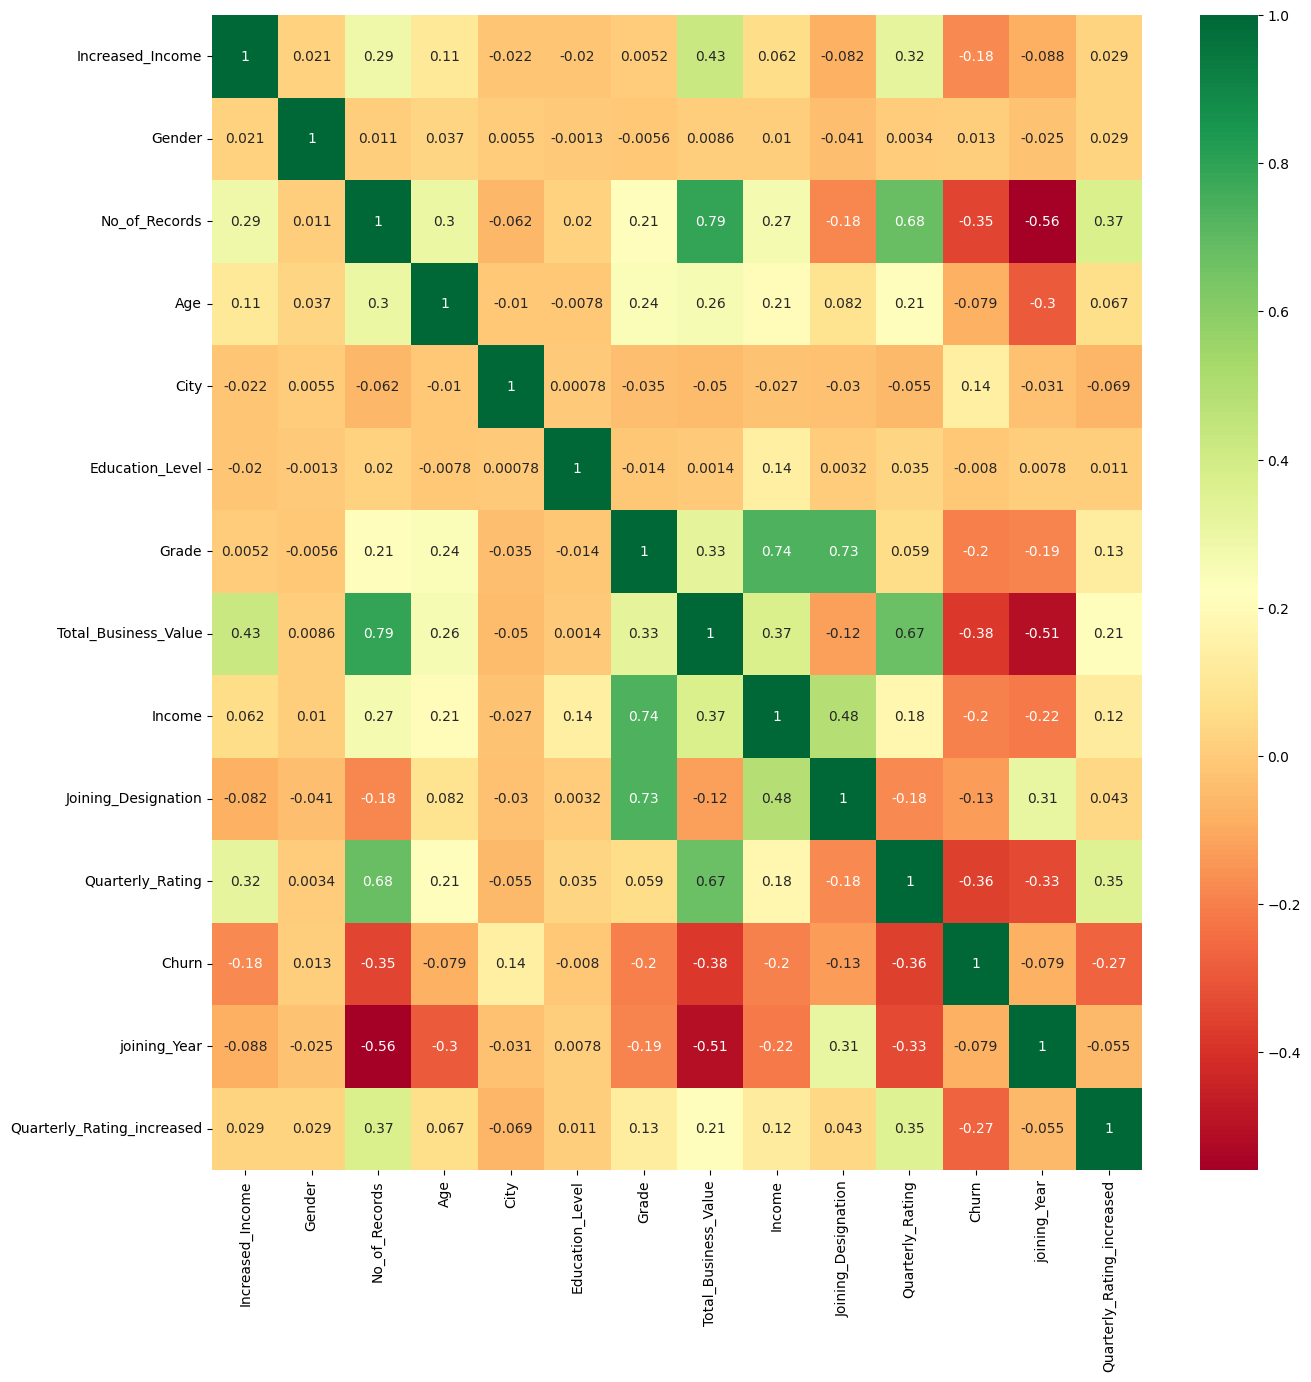

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(Mdata.corr(),annot=True, cmap="RdYlGn", annot_kws={"size":10})

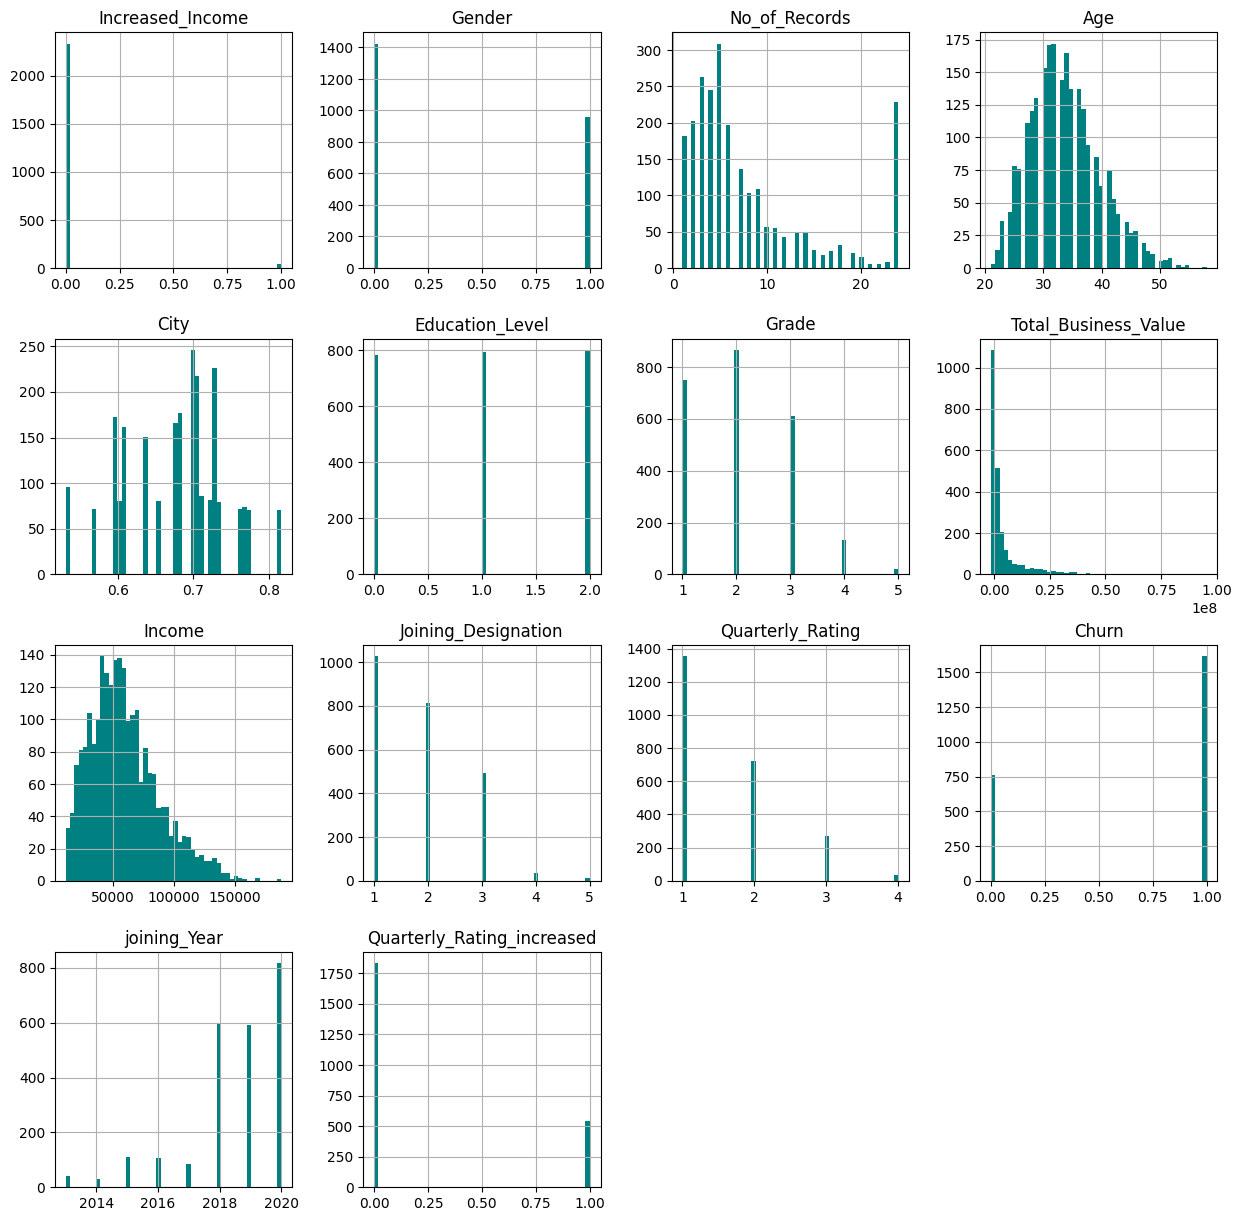

In [ ]:
Mdata.hist(color='teal',figsize=(15,15),bins=50)
plt.show()

In [ ]:
X = Mdata.drop(["Churn"],axis = 1)
y = Mdata["Churn"]

KNNImputer

In [ ]:
import numpy as np
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

In [ ]:
X = pd.DataFrame(imputer.fit_transform(X),columns=X.columns)

In [ ]:
X

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Grade,Total_Business_Value,Income,Joining_Designation,Quarterly_Rating,joining_Year,Quarterly_Rating_increased
0,0.0,0.0,3.0,28.0,0.769859,2.0,1.0,1715580.0,57387.0,1.0,2.0,2018.0,0.0
1,0.0,0.0,2.0,31.0,0.684190,2.0,2.0,0.0,67016.0,2.0,1.0,2020.0,0.0
2,0.0,0.0,5.0,43.0,0.816064,2.0,2.0,350000.0,65603.0,2.0,1.0,2019.0,0.0
3,0.0,0.0,3.0,29.0,0.706553,0.0,1.0,120360.0,46368.0,1.0,1.0,2019.0,0.0
4,0.0,1.0,5.0,31.0,0.702829,1.0,3.0,1265000.0,78728.0,3.0,2.0,2020.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2376,0.0,0.0,24.0,34.0,0.698531,0.0,3.0,21748820.0,82815.0,2.0,3.0,2015.0,1.0
2377,0.0,1.0,3.0,34.0,0.706553,0.0,1.0,0.0,12105.0,1.0,1.0,2020.0,0.0
2378,0.0,0.0,9.0,45.0,0.570044,0.0,2.0,2815090.0,35370.0,2.0,2.0,2018.0,0.0
2379,0.0,1.0,6.0,28.0,0.730263,2.0,1.0,977830.0,69498.0,1.0,2.0,2018.0,0.0


In [ ]:
X.describe()

,Increased_Income,Gender,No_of_Records,Age,City,Education_Level,Grade,Total_Business_Value,Income,Joining_Designation,Quarterly_Rating,joining_Year,Quarterly_Rating_increased
count,2381.000000,2381.000000,2381.00000,2381.000000,2381.000000,2381.00000,2381.000000,2.381000e+03,2381.000000,2381.000000,2381.000000,2381.000000,2381.000000
mean,0.018480,0.401512,8.02352,33.663167,0.678662,1.00756,2.078538,4.586742e+06,59232.460484,1.820244,1.573289,2018.536329,0.228895
std,0.134706,0.490307,6.78359,5.983375,0.065356,0.81629,0.931321,9.127115e+06,28298.214012,0.841433,0.745987,1.609597,0.420210
min,0.000000,0.000000,1.00000,21.000000,0.531324,0.00000,1.000000,-1.385530e+06,10747.000000,1.000000,1.000000,2013.000000,0.000000
25%,0.000000,0.000000,3.00000,29.000000,0.634237,0.00000,1.000000,0.000000e+00,39104.000000,1.000000,1.000000,2018.000000,0.000000
50%,0.000000,0.000000,5.00000,33.000000,0.698531,1.00000,2.000000,8.176800e+05,55285.000000,2.000000,1.000000,2019.000000,0.000000
75%,0.000000,1.000000,10.00000,37.000000,0.719430,2.00000,3.000000,4.173650e+06,75835.000000,2.000000,2.000000,2020.000000,0.000000
max,1.000000,1.000000,24.00000,58.000000,0.816064,2.00000,5.000000,9.533106e+07,188418.000000,5.000000,4.000000,2020.000000,1.000000


# train_test_split

In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test, y_train ,y_test = train_test_split(X,y,
                                                    random_state=5,
                                                    test_size=0.2)

In [ ]:
y.value_counts()

1    1616
0     765
Name: Churn, dtype: int64

# StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)
X_test =  scaler.transform(X_test)

# RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight="balanced",
    ccp_alpha=0.0085,
    max_samples=None,)

In [ ]:
RF.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.0085, class_weight='balanced',
                       criterion='entropy', max_depth=10)

In [ ]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.8771008403361344, 0.8658280922431866)

In [ ]:
RF.feature_importances_

array([3.61993409e-03, 2.52702485e-04, 2.49213313e-01, 1.43171386e-02,
       1.36835994e-02, 1.10952902e-03, 1.54105149e-02, 1.89160186e-01,
       2.28813025e-02, 2.70913682e-02, 9.13081251e-02, 3.33454511e-01,
       3.84977755e-02])

In [ ]:
X.columns

Index(['Increased_Income', 'Gender', 'No_of_Records', 'Age', 'City',
       'Education_Level', 'Grade', 'Total_Business_Value', 'Income',
       'Joining_Designation', 'Quarterly_Rating', 'joining_Year',
       'Quarterly_Rating_increased'],
      dtype='object')

<Axes: >

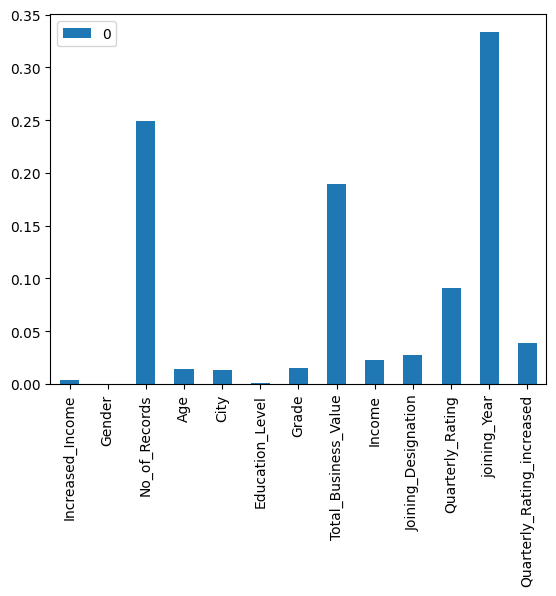

In [ ]:
pd.DataFrame(data=RF.feature_importances_,
            index=X.columns).plot(kind="bar")

In [ ]:
from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix

In [ ]:
confusion_matrix(y_test,RF.predict(X_test) )

array([[143,  19],
       [ 45, 270]])

In [ ]:
confusion_matrix(y_train,RF.predict(X_train) )

array([[ 544,   59],
       [ 175, 1126]])

In [ ]:
f1_score(y_test,RF.predict(X_test)),f1_score(y_train,RF.predict(X_train))

(0.8940397350993377, 0.9058728881737731)

In [ ]:
precision_score(y_test,RF.predict(X_test)),precision_score(y_train,RF.predict(X_train))

(0.9342560553633218, 0.950210970464135)

In [ ]:
recall_score(y_test,RF.predict(X_test)),recall_score(y_train,RF.predict(X_train))

(0.8571428571428571, 0.865488086087625)

# GridSearchCV - on RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[7,10,15],
             "n_estimators":[100,200,300,400],
             "max_features":[4,7,10],
             "ccp_alpha":[0.0005,0.00075,0.001]}

RFC = RandomForestClassifier()
grid_search = GridSearchCV(
    estimator = RFC,
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,                   # need not to train again after grid search
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)

In [ ]:
grid_search.fit(X_train,y_train.values.ravel())

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'ccp_alpha': [0.0005, 0.00075, 0.001],
                         'max_depth': [7, 10, 15], 'max_features': [4, 7, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy')

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(ccp_alpha=0.0005, max_depth=10, max_features=7,
                       n_estimators=300)

In [ ]:
grid_search.best_score_

0.8876168475785953

In [ ]:
grid_search.best_params_

{'ccp_alpha': 0.0005, 'max_depth': 10, 'max_features': 7, 'n_estimators': 300}

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=100,
    criterion='entropy',
    max_depth=7,
    min_samples_split=2,
    min_samples_leaf=1,

    class_weight="balanced",
    ccp_alpha=0.0001,
    max_samples=None)

In [ ]:
RF.fit(X_train , y_train)

RandomForestClassifier(ccp_alpha=0.0001, class_weight='balanced',
                       criterion='entropy', max_depth=7)

In [ ]:

RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.8975840336134454, 0.8805031446540881)

In [ ]:
y_test_pred = RF.predict(X_test)
y_train_pred = RF.predict(X_train)

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)

(0.9079159935379644, 0.9226497421658073)

In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)

(0.9243421052631579, 0.9532786885245902)

In [ ]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.8920634920634921, 0.8939277478862413)

BaggingClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

from sklearn.ensemble import BaggingClassifier

In [ ]:
bagging_classifier_model = BaggingClassifier(base_estimator=  DecisionTreeClassifier(max_depth=7,
                                                                                     class_weight="balanced"),
                                            n_estimators=50,
                                            max_samples=1.0,
                                            max_features=1.0,
                                            bootstrap=True,
                                            bootstrap_features=False,
                                            oob_score=False,
                                            warm_start=False,
                                            n_jobs=None,
                                            random_state=None,
                                            verbose=0,)

In [ ]:
bagging_classifier_model.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight='balanced',
                                                        max_depth=7),
                  n_estimators=50)

In [ ]:

from sklearn.metrics import f1_score , precision_score, recall_score,confusion_matrix

In [ ]:
y_test_pred = bagging_classifier_model.predict(X_test)
y_train_pred = bagging_classifier_model.predict(X_train)

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[141,  21],
       [ 41, 274]])

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[ 558,   45],
       [ 121, 1180]])

In [ ]:
f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)

(0.898360655737705, 0.9342834520981789)

In [ ]:
precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)

(0.9288135593220339, 0.963265306122449)

In [ ]:

recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.8698412698412699, 0.9069946195234435)

In [ ]:
bagging_classifier_model.score(X_test,y_test)

0.870020964360587

In [ ]:
bagging_classifier_model.score(X_train,y_train)


0.9128151260504201

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

parameters = {"max_depth":[2,4,6,10],
             "n_estimators":[100,200,300,400]    }


grid_search = GridSearchCV(
    estimator = XGBClassifier(),
    param_grid = parameters,
    scoring = "accuracy",
    n_jobs = -1,
    refit=True,                   # need not to train again after grid search
    cv=3,
    pre_dispatch='2*n_jobs',
    return_train_score=False)


grid_search.fit(X_train,y_train.values.ravel())

grid_search.best_estimator_

grid_search.best_score_

grid_search.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [ ]:
xgb = XGBClassifier(n_estimators=100,
                   max_depth = 2)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_test_pred = xgb.predict(X_test)
y_train_pred = xgb.predict(X_train)

In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[124,  38],
       [ 27, 288]])

In [ ]:
confusion_matrix(y_train,y_train_pred)

array([[ 518,   85],
       [  74, 1227]])

In [ ]:
xgb.score(X_train,y_train),xgb.score(X_test,y_test)

(0.9164915966386554, 0.8637316561844863)

In [ ]:

f1_score(y_test,y_test_pred),f1_score(y_train,y_train_pred)

(0.8985959438377534, 0.939150401836969)

In [ ]:
recall_score(y_test,y_test_pred),recall_score(y_train,y_train_pred)

(0.9142857142857143, 0.9431206764027671)

In [ ]:

precision_score(y_test,y_test_pred),precision_score(y_train,y_train_pred)

(0.8834355828220859, 0.9352134146341463)

In [ ]:
xgb.feature_importances_

array([0.        , 0.01606189, 0.17709923, 0.01209497, 0.01767639,
       0.01949469, 0.01595087, 0.05166429, 0.01630889, 0.01846728,
       0.22809228, 0.35326236, 0.07382689], dtype=float32)

<Axes: >

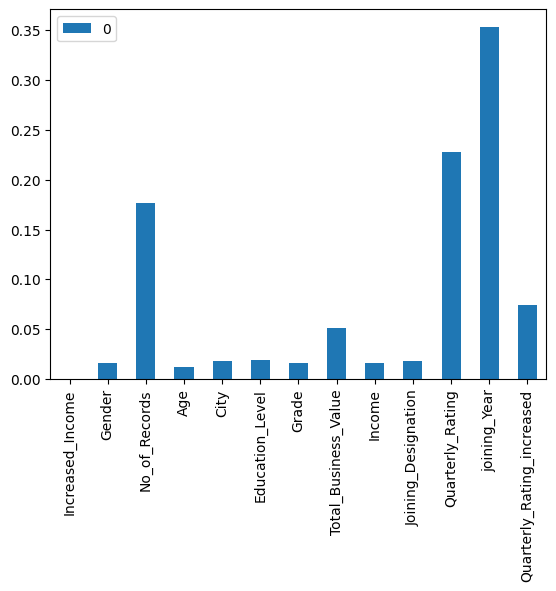

In [ ]:
pd.DataFrame(data=xgb.feature_importances_,
            index=X.columns).plot(kind="bar")

# GradientBoostingClassifier

In [ ]:
def GradientBoostingClassifier(X, y):
    from sklearn.ensemble import  GradientBoostingClassifier
    from sklearn.metrics import f1_score, accuracy_score , roc_auc_score,auc,recall_score,precision_score
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y,
                                                        test_size=0.2,
                                                        random_state=1)

    lr = GradientBoostingClassifier()
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)

    lr.fit(X_train, y_train)
    y_pred = lr.predict(X_test)
    prob = lr.predict_proba(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print('Train Score : ', lr.score(X_train, y_train), '\n')
    print('Test Score : ', lr.score(X_test, y_test), '\n')
    print('Accuracy Score : ', accuracy_score(y_test, y_pred), '\n')
    print(cm, "---> confusion Matrix ", '\n')
    print("ROC-AUC score  test dataset:  ", roc_auc_score(y_test, prob[:, 1]),'\n')
    print("precision score  test dataset:  ", precision_score(y_test, y_pred),'\n')
    print("Recall score  test dataset:  ", recall_score(y_test, y_pred), '\n')
    print("f1 score  test dataset :  ", f1_score(y_test, y_pred), '\n')
    return (prob[:,1], y_test)

In [ ]:
probs , y_test = GradientBoostingClassifier(X,y)

Train Score :  0.914390756302521 

Test Score :  0.8909853249475891 

Accuracy Score :  0.8909853249475891 

[[125  23]
 [ 29 300]] ---> confusion Matrix  

ROC-AUC score  test dataset:   0.9447034420438676 

precision score  test dataset:   0.9287925696594427 

Recall score  test dataset:   0.9118541033434651 

f1 score  test dataset :   0.9202453987730062 



In [ ]:
def plot_pre_curve(y_test,probs):
    from sklearn.metrics import precision_recall_curve
    precision, recall, thresholds = precision_recall_curve(y_test, probs)
    plt.plot([0, 1], [0.5, 0.5], linestyle='--')
    # plot the precision-recall curve for the model
    plt.plot(recall, precision, marker='.')
    plt.title("Precision Recall curve")
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    # show the plot
    plt.show()

def plot_roc(y_test,prob):
    from sklearn.metrics import roc_curve
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    # plot no skill
    plt.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    plt.plot(fpr, tpr, marker='.')
    plt.title("ROC curve")
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    # show the plot
    plt.show()

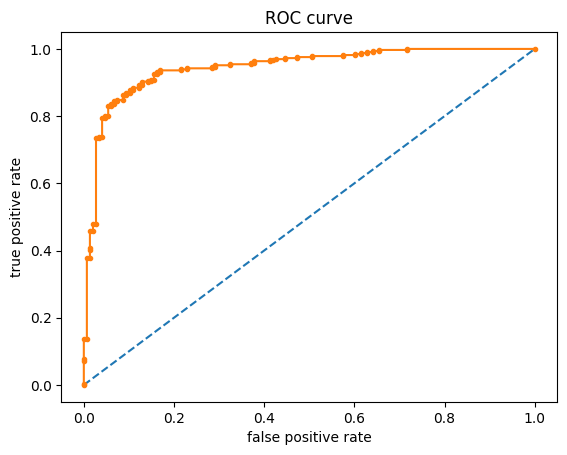

In [ ]:
plot_roc(y_test , probs)

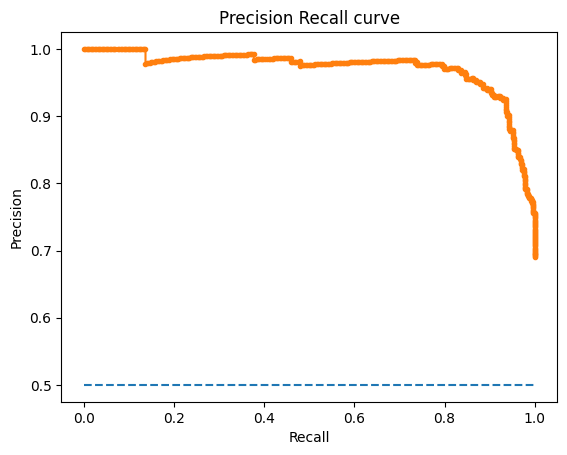

In [ ]:
plot_pre_curve(y_test , probs)

Inferences :

from data distribution: Male 1380 Female 956

Churn : distribution: 1 1616 (67.870%) 0 765 (32.12%)

* Probability of Churn is higher in case of education level 0 and 1 than 2.

* in case of joining destination 1, probability of churn is higher.

* in case of quarterly rating is 1, probability of churn is significantly higher.

* also same pattern is observed in case of when driver's quarterly rating has increased through out tenure.

* due to some reason , for drivers who joined in 2018 and 2019 , probability of churn is very high compare to 2020 and before 2018.

Random Forest :

* train and test score : (0.8697478991596639, 0.8679245283018868)
* feature importance : highest is : joining year , followed by  No of records available in data, and total business value.
* recall : 0.866
* precision: 0.928
* f1-score : 0.89

on Grid Search CV : RF :

* best params : ccp_alpha=0.001, max_depth=10, max_features=7,n_estimators=300
* Gridsearch RF best score : 0.8881417819617973

Bagging Classfier : wwith Decision Tree :

* with 50 DTs. when max_depth=7, class_weight="balanced"
* f1 score : 0.9064039408866995
* precision : 0.9387755102040817
* recall_score : 0.8761904761904762
* accuracy: 0.880

XGBoost Classifier: (Grid SEARCH CV : ) 'max_depth': 2, 'n_estimators': 100

* test Scores :

* Accuracy : 0.87

* f1 score : 0.90

* recall : 0.923

* precision : 0.884

* feature importance : highest is : joining year , followed by No of records available in data, and total business value.

GradientBoostingClassifier : GBDC:

* Train Score : 0.914390756302521
* Test Score : 0.8909853249475891
* Accuracy Score : 0.8909853249475891
* ROC-AUC score test dataset: 0.9447855910621867
* precision score test dataset: 0.9287925696594427
* Recall score test dataset: 0.9118541033434651
* f1 score test dataset : 0.9202453987730062

# INSIGHTS

* So we see that there are 57% male employees and 43% female employees.

* The percentages of employees with different education levels are almost same for level 1 & 2.

* 97.3% of the employees who did not get a raise.

* Almost 43% of the employees joined at lowest designation (1).

* 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.

* Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 5% of the employees are currently in higher designations.

* Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 2.6% received a raise in income.

* Number of employees has been increase with increase in year as well as number of reportings.

* The majority of the employees seem to be associated with city C20.

* Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.

* Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.

* Income decreses with increase in Destination as about 4% of the employees hold higher designations.

* The median of the Income for employees having higher Grades is greater.

* Distribution of Income for enployes at different Education level is about a change of 3-5% with level 0.

* Joining Designation Increases with increase in Grade.
Top reporting days is 24 days.

* About 55% of the reportings of the employees has got Quarlerly Rating 1.

* Number of reportings increases with increase in Income as well as Total Business Value.

* Recall increased after treatment of data imbalance and is performing bettee in Gradient Boosting.

* Precision dropped after treatment of data imbalance and is performing better in Random Forest.

* F1_score incresed after the treatment of imabalanced data and in Gradient Boosting.

# Recommendations:

* Address gender imbalance by implementing strategies to attract and retain more female employees.

* Evaluate the promotion and raise processes to ensure fairness, considering the low percentage of employees receiving raises and the moderate promotion rate.

* Focus on targeted recruitment efforts for higher designation levels to balance the current concentration in lower levels.

* Investigate the decline in income and business value after the age of 45-50, providing support or adjustments for employees in that age range.

* Enhance data reporting and analysis for City C20, considering its majority association among employees.

* Consider implementing initiatives to improve quarterly ratings, as 55% of employees currently have a rating of 1.
